In [2]:
import requests
from bs4 import BeautifulSoup
import re

def scrape_imdb_top_movies(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                      "AppleWebKit/537.36 (KHTML, like Gecko) "
                      "Chrome/116.0 Safari/537.36"
    }

    response = requests.get(url, headers=headers)
    response.raise_for_status()

    soup = BeautifulSoup(response.text, "html.parser")
    movies = []

    # Each movie entry is inside a <li> with role="presentation"
    movie_items = soup.select("li.ipc-metadata-list-summary-item")

    for item in movie_items:
        # Title
        title_tag = item.find("h3")
        title = title_tag.get_text(strip=True) if title_tag else "N/A"

        # Year: find <span> that contains exactly 4 digits
        year_tag = item.find("span", string=re.compile(r"\b\d{4}\b"))
        year = year_tag.get_text(strip=True) if year_tag else "N/A"

        # Rating: look for span with rating-star class
        rating_tag = item.find("span", class_=re.compile(r"ipc-rating-star--rating"))
        rating = rating_tag.get_text(strip=True) if rating_tag else "N/A"

        movies.append({"title": title, "year": year, "rating": rating})

    return movies


if __name__ == "__main__":
    url = "https://www.imdb.com/chart/top/?ref_=chtmvm_ql_3"
    movies = scrape_imdb_top_movies(url)

    # Print first 10 to verify
    for m in movies[:10]:
        print(f"{m['title']} ({m['year']}) — Rating: {m['rating']}")



1. The Shawshank Redemption (1994) — Rating: 9.3
2. The Godfather (1972) — Rating: 9.2
3. The Dark Knight (2008) — Rating: 9.1
4. The Godfather Part II (1974) — Rating: 9.0
5. 12 Angry Men (1957) — Rating: 9.0
6. The Lord of the Rings: The Return of the King (2003) — Rating: 9.0
7. Schindler's List (1993) — Rating: 9.0
8. Pulp Fiction (1994) — Rating: 8.8
9. The Lord of the Rings: The Fellowship of the Ring (2001) — Rating: 8.9
10. The Good, the Bad and the Ugly (1966) — Rating: 8.8


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert scraped data into DataFrame
df = pd.DataFrame(movies)

# Convert year to int
df['year'] = df['year'].astype(int)

# Create decade column
df['decade'] = (df['year'] // 10) * 10

# Count movies per decade
decade_counts = df['decade'].value_counts().sort_index()

print(decade_counts)


decade
1940     1
1950     2
1960     1
1970     3
1980     1
1990    11
2000     4
2010     2
Name: count, dtype: int64


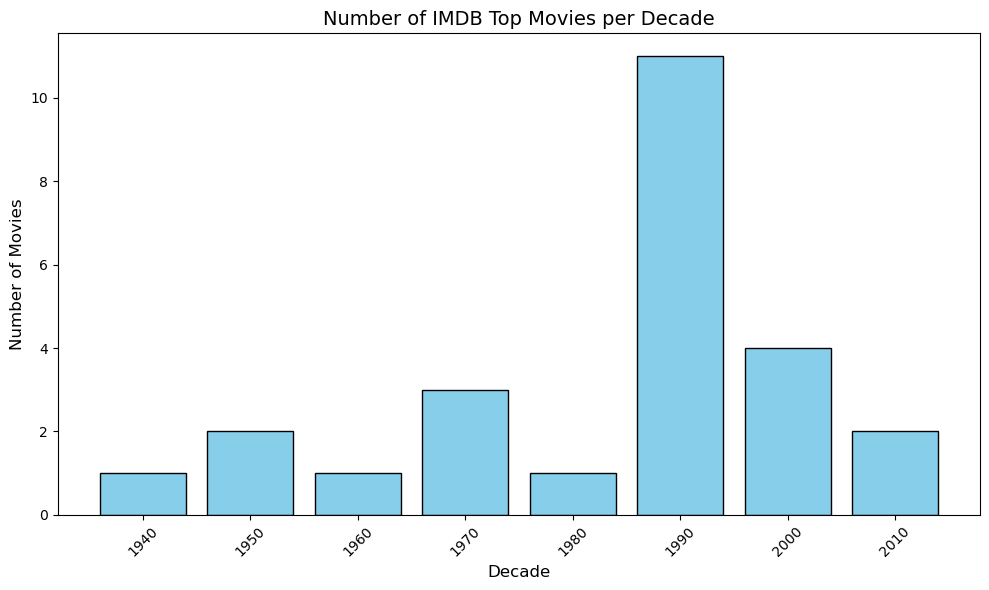

In [7]:
# Plot histogram (bar chart)
plt.figure(figsize=(10,6))
plt.bar(decade_counts.index.astype(str), decade_counts.values, color="skyblue", edgecolor="black")
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Number of IMDB Top Movies per Decade", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()